# Smartphone Sales Analysis : Detect Smartphone Trands in the mini market

### __author__ = "Mujib Sukri Luman"
 ### __Email__ = ["mujibsukriluman@gmail.com"](mujibsukriluman@gmail.com)
### __website__ = ["nurastars@figcube.com"](https://nurastars.figcube.com/)

---

# Introdcution
---
-  Technology and communication currently play an important role in life. The effects are clearly visible is the use of Smartphones that encourages competition between different Smartphone Brands. [refers to public information](https://databoks.katadata.co.id/datapublish/2023/06/06/idc-pasar-smartphone-indonesia-merosot-119-kuartal-i-2023-siapa-pemimpin-pasar), in 2021, smartphone shipments from abroad in the first quartile as much as 7.9 million. A smartphone mini market wants to open new branch in throughout Indonesia, he wants to give tough fight to big shops. He does not know how to estimate price of smartphones his shop. In other cases, that it cannot be predicted for smartphone sales in the future, where sales can be occurred unstable at one time, which result in stock product difficult to predict. In this competitive mobile phone, we cannot simply things. To solve this problem, we must collect several datasets of mobile phones of various famous and advanced shop in Indonesia. In this problem we do not have to predict actual price but a price range indicating how high the price is. And then what models of smartphones are a target of costumes.

- for this reason, in order to make easier it for stores to prepare stocks of sales product Brand Smartphone sales in the future. we mush forecasting with data mining prediction method using the Support Vector Machine because result of this method gooforecasting.

___

# Baseline
* A baseline model is a simple, basic model that serves as a starting point or reference for
comparison against more complex models

* . The purpose of a baseline model is to provide a minimum performance threshold that
more advanced models should aim to exceed. It helps contextualize the results of the
trained mod were i get this modeling value? please [click](http://localhost:8888/notebooks/Downloads/analysis%20of%20phone%20reseller/data/sales%20phone%20with%20sample%20model.ipynb)els.

### [{'algoritm__n_neighbors': 13, 'algoritm__p': 1, 'algoritm__weights': 'uniform'}](http://localhost:8888/notebooks/Downloads/analysis%20of%20phone%20reseller/data/sales%20phone%20with%20sample%20model.ipynb)
### [0.17164179104477612 0.06717171717171717 0.088235294117647064](http://localhost:8888/notebooks/Downloads/analysis%20of%20phone%20reseller/data/sales%20phone%20with%20sample%20model.ipynb)

---

# Libraries Importing

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.plot import plot_missing_value
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from jcopml.tuning import grid_search_params as gsp
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from jcopml.utils import save_model

# dataset Importing

In [2]:
dataset = pd.read_csv('Indonesian Phone Dataset.csv')
dataset.drop(columns=['weight'], inplace=True)

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   memory            168 non-null    int64  
 1   internal_storage  168 non-null    int64  
 2   os_price          168 non-null    int64  
 3   dual_sim          168 non-null    int64  
 4   esim              168 non-null    int64  
 5   memory_slot       168 non-null    int64  
 6   5g                168 non-null    int64  
 7   nfc               168 non-null    int64  
 8   body_length       168 non-null    float64
 9   body_width        168 non-null    float64
 10  body_thickness    168 non-null    float64
 11  battery           168 non-null    int64  
 12  display_type      168 non-null    object 
 13  display_size      168 non-null    float64
 14  display_res       168 non-null    int64  
 15  refesh_rate       168 non-null    int64  
 16  display_hdr       168 non-null    int64  
 1

# Exploratory Data Analysis

### a. ploting 

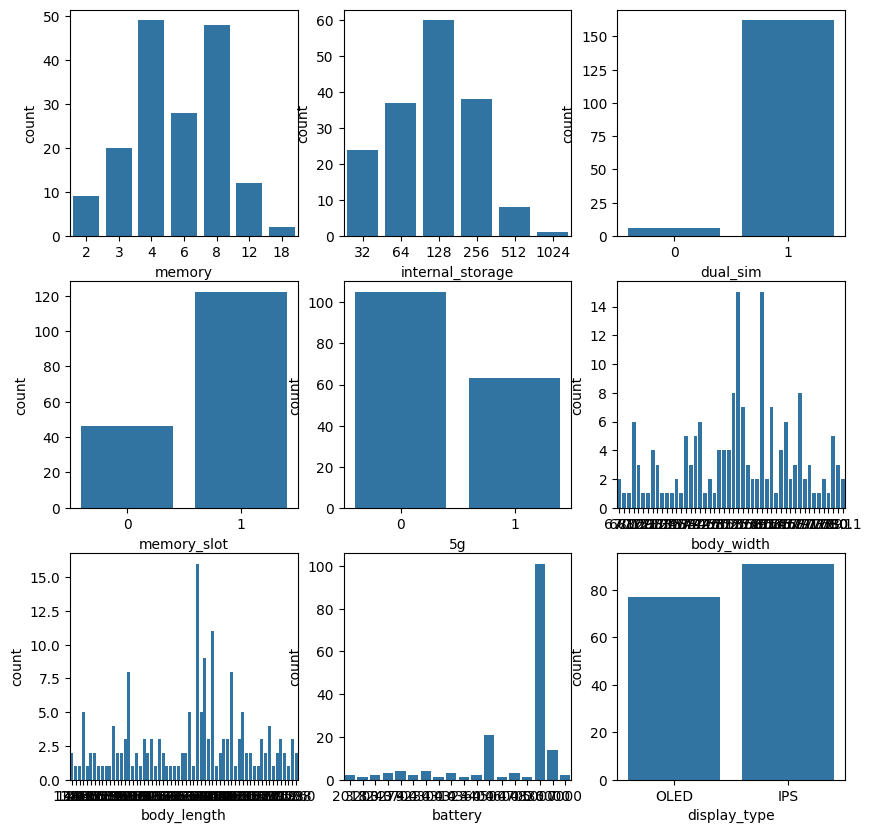

In [3]:
cat_var =['memory', 'internal_storage', 'dual_sim', 'memory_slot', '5g','body_width', 'body_length', 'battery', 'display_type']

fig, axes = plt.subplots(3,3, figsize=(10,10))
for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(data=dataset, x=cat, ax=ax)# hue='os_price'
plt.savefig('oke.jpg')
plt.show()


### b. adding faeture 

In [4]:
#smartphone for gaming
dataset['gaming']= (dataset.memory == 4) & (dataset.internal_storage >= 64) & (dataset.battery >= 3000)

In [5]:
#adding brand of smartphone
dataset['brand']= dataset.device.apply(lambda name : (name.split(' ')[0]))
dataset.drop(columns='device', inplace=True)

### Modifiying name to become a new feature

In [6]:
def modif_name(x):
    if x in ['Xiaomi', 'Samsung', 'OPPO', 'vivo', 'INFINIX', 'realme', 'Apple']:
        return x
    else:
        return 'other'
dataset['brand'] = dataset.brand.apply(modif_name)

# Splitting dataset

In [7]:
X = dataset.drop(columns='os_price')
y = dataset.os_price
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((134, 18), (34, 18), (134,), (34,))

# Training dataset

## I. training dataset using K-nearest neighbors (KNN)

In [45]:
numerical_pipline = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_pipline = Pipeline([
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipline, ['memory', 'internal_storage', 'body_length', 'body_width',
                                    'body_thickness', 'battery', 'display_size', 'display_res', 'refesh_rate','display_hdr']),
    ('categoric', categorical_pipline,['dual_sim', 'esim', 'memory_slot', '5g', 'nfc','display_type', 'gaming', 'brand'])
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algoritm', KNeighborsClassifier())
])

#parameter tuning
parameter = {
    'algoritm__n_neighbors': np.arange(1,52, 3), #  parameter : pipline.get_params()
    'algoritm__weights': ['uniform', 'distance'],
    'algoritm__p' : [1,2]
}

model = GridSearchCV(pipline, param_grid=parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)
#evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_,model.score(X_test, y_test))

Fitting 3 folds for each of 68 candidates, totalling 204 fits


C:\Users\User\anaconda3\envs\myproject\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


{'algoritm__n_neighbors': 43, 'algoritm__p': 1, 'algoritm__weights': 'uniform'}
0.08955223880597014 0.06700336700336701 0.029411764705882353


## II. training model using Suport Vector Machine

In [8]:
from jcopml.pipeline import num_pipe, cat_pipe
# it is helpul for dataset can be adjust, but in perpect performent we must make it manually 

In [38]:

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), ['memory', 'internal_storage', 'body_length', 'body_width',
                                    'body_thickness', 'battery', 'display_size', 'display_res', 'refesh_rate','display_hdr']),
    ('categoric', cat_pipe(encoder='onehot'),['dual_sim', 'esim', 'memory_slot', '5g', 'nfc','display_type', 'gaming', 'brand'])
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


#### Modeling data

In [22]:
model = GridSearchCV(pipline, param_grid=gsp.svm_params, cv=3, n_jobs=1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['memory',
                                                                          'internal_storage',
                                                                          'body_length',
                                                                          'body_width',
                                                                          'body_thickness',
                                                                          'battery',
                                                                          'display_size',
                                                                          'display_res',
                                                                          'refesh_rate',
                                                                          'display_hdr']),
                                                                        ('categoric',
                                                                         Pipeline(...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['dual_sim',
                                                                          'esim',
                                                                          'memory_slot',
                                                                          '5g',
                                                                          'nfc',
                                                                          'display_type',
                                                                          'gaming',
                                                                          'brand'])])),
                                       ('algo', SVR(max_iter=500))]),
             n_jobs=1,
             param_grid={'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             verbose=1)

In [23]:
print(model.best_params_)
print(model.score(X_train, y_train),model.best_score_, model.score(X_test, y_test))

{'algo__C': 1000.0, 'algo__gamma': 0.01}
0.581526888078695 0.44171614968146633 0.5545180238313991


#### traying with Polynomial Features

In [25]:

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, scaling='standard'), ['memory', 'internal_storage', 'body_length', 'body_width',
                                    'body_thickness', 'battery', 'display_size', 'display_res', 'refesh_rate','display_hdr']),
    ('categoric', cat_pipe(encoder='onehot'),['dual_sim', 'esim', 'memory_slot', '5g', 'nfc','display_type', 'gaming', 'brand'])
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


In [26]:
model = GridSearchCV(pipline, gsp.svm_poly_params, cv=3, n_jobs=1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly',
                                                                                          PolynomialFeatures()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['memory',
                                                                          'internal_storage',
                                                                          'body_length',
                                                                          'body_width',
                                                                          'body_thickness',
                                                                          'battery',
                                                                          'display_size',
                                                                          'display_res',
                                                                          'refesh_rate',
                                                                          'display...
                                                                          'memory_slot',
                                                                          '5g',
                                                                          'nfc',
                                                                          'display_type',
                                                                          'gaming',
                                                                          'brand'])])),
                                       ('algo', SVR(max_iter=500))]),
             n_jobs=1,
             param_grid={'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'prep__numeric__poly__degree': [1, 2, 3],
                         'prep__numeric__poly__interaction_only': [True,
                                                                   False]},
             verbose=1)

In [27]:
print(model.best_params_)
print(model.score(X_train, y_train),model.best_score_, model.score(X_test, y_test))

{'algo__C': 1000.0, 'algo__gamma': 0.01, 'prep__numeric__poly__degree': 2, 'prep__numeric__poly__interaction_only': True}
0.6645243154356459 0.537670122503421 0.5680978653499694


# conclusion 
# the result of modeling dataset can`t be improved because lowing dataset. it is will be overfitting and underfitting. not about algorithm using the wrong method but little of input dataset.